# Laboratorio 3.1: Clasificación

Profesoras de Cátedra: Jazmine Maldonado, Cinthia Sánchez Profesores Auxiliares: Fran Zautzik, María José Zambrano

Septiembre 2023


## Nombres

* Martín E. Bravo
* Felipe Avendaños

## Instrucciones

1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo **html**. Genere un archivo HTML usando jupyter (ver tutorial 2) y súbalo a U-Cursos. Basta con que **uno de los integrantes haga la entrega**. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


A continuación vamos a cargar un dataset con noticias, el cual se puede encontrar en: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification.

Los atributos que posee son:

- URL : El link a la noticia
- News: El texto de la noticia
- Type: La clasificación de la noticia


Para el laboratoria solo nos importan las columnas News y Type.


In [15]:
import pandas as pd
df = pd.read_csv("df_total.csv")
df = df[["news", "Type"]]
df = df.rename(columns={
    'news': 'Noticia', 'Type':'Clasificación'})
df.head()

,Noticia,Clasificación
0,Durante el foro La banca articulador empresari...,Otra
1,El regulador de valores de China dijo el domin...,Regulaciones
2,En una industria históricamente masculina como...,Alianzas
3,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,Ayer en Cartagena se dio inicio a la versión n...,Otra


A continuación preprocesaremos los textos y los convertiremos en vectores. Esto con el propósito de tener información numérica que pueda ser interpretable por los modelos que crearemos después.


In [20]:
import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())


def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)


def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text


def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

url = "https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt"
r = requests.get(url)

stopwords_list = r.text.splitlines()

def preprocesar(text):
    text = text.lower()
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()


# Extraer los vectores
vectorizer = CountVectorizer(preprocessor=preprocesar, min_df=2)
vectors = vectorizer.fit_transform(df["Noticia"])

# Incorporar los vectores como dataframe
X = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
y = df["Clasificación"]

df_vectorizado = pd.concat([y, X], axis=1)
df_vectorizado.head()


,Clasificación,aa,aaa,abacum,abajo,abandonar,abandono,abanico,abaratamiento,abaratar,...,zero,zhao,zijin,zmvm,zona,zonas,zuckerberg,zug,zuluaga,zurich
0,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regulaciones,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alianzas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Macroeconomia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pregunta 1

Cargue los datos e indique lo siguiente:

- Tamaño del dataset vectorizado (cantidad de instancias y atributos).
- ¿Cuántas clases hay en la columna "Clasificación" y cuáles son sus nombres?
- ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.



In [29]:
#Respuesta

# Tamaño dataset
print(df_vectorizado.shape, "\n")

# Seleccionar datos unicos de una columna
print(df_vectorizado["Clasificación"].unique(),"\n")

# Instancia en cada clase
print(df_vectorizado["Clasificación"].value_counts())


(1217, 14407) 

['Otra' 'Regulaciones' 'Alianzas' 'Macroeconomia' 'Innovacion'
 'Sostenibilidad' 'Reputacion'] 

Clasificación
Macroeconomia     340
Alianzas          247
Innovacion        195
Regulaciones      142
Sostenibilidad    137
Otra              130
Reputacion         26
Name: count, dtype: int64


Tamaño del dataset vectorizado (cantidad de instancias y atributos).

R: El tamaño del dataset vectorizado es de 1217 filas y 14407 columnas

¿Cuántas clases hay en la columna "Clasificación" y cuáles son sus nombres?

R: Hay 7 clases: 'Otra' 'Regulaciones' 'Alianzas' 'Macroeconomia' 'Innovacion' 'Sostenibilidad' 'Reputacion'

¿Cuántas instancias hay en cada clase?

R:

| Tema           | Cantidad |
|----------------|---------:|
| Macroeconomia  |      340 |
| Alianzas       |      247 |
| Innovacion     |      195 |
| Regulaciones   |      142 |
| Sostenibilidad |      137 |
| Otra           |      130 |
| Reputacion     |       26 |

### Pregunta 2


En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas.


Usando el siguiente código, entrenaremos un clasificador con los datos cargados (X, y) y haremos una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, se mostrarán las métricas de **accuracy**, **precision**, **recall** y **f1-score**.


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X, y)
y_pred = clf.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 0.9967132292522597
                precision    recall  f1-score   support

      Alianzas       0.99      1.00      0.99       247
    Innovacion       1.00      1.00      1.00       195
 Macroeconomia       1.00      1.00      1.00       340
          Otra       1.00      0.98      0.99       130
  Regulaciones       1.00      0.99      1.00       142
    Reputacion       1.00      1.00      1.00        26
Sostenibilidad       1.00      0.99      1.00       137

      accuracy                           1.00      1217
     macro avg       1.00      1.00      1.00      1217
  weighted avg       1.00      1.00      1.00      1217



De acuerdo a los resultados obtenidos:

- ¿Qué opina sobre las predicciones?
- ¿Qué problema puede identificar?


**Respuesta:**

¿Qué opina sobre las predicciones?

R: Las predicciones son bastante exactas segun las métricas, pues el accuracy, precision, recall, f1-score son cercanos a 1.

¿Que problema puede identificar?

R: Pero tambien podemos ver que no se divide el dataset en conjunto de entrenamiento y prueba, por lo que el modelo se entrena sobre el dataset completo y por lo tanto tiene un muy buen desempeño al evaluarse sobre este mismo, pero dicho desempeño es particular a dicho conjunto de datos, pues no se evalua el desempeño con datos nuevos (solo datos que el modelo ya observó).

### Pregunta 3.1


Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (**_training set_**) y 30% para testear (**_testing set_**). Use la función **_train_test_split()_** de _sklearn_ y utilice las variables `X_train, X_test, y_train, y_test`.


Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador.

Entrene usando el **_training set_** y pruebe sobre el **_testing set_**, en base a la división 70%-30%, respectivamente

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [36]:
# Recuerde usar las variables X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7868852459016393
                precision    recall  f1-score   support

      Alianzas       0.83      0.80      0.81        74
    Innovacion       0.79      0.76      0.78        59
 Macroeconomia       0.79      0.89      0.84       102
          Otra       0.82      0.72      0.77        39
  Regulaciones       0.71      0.74      0.73        43
    Reputacion       0.83      0.62      0.71         8
Sostenibilidad       0.74      0.68      0.71        41

      accuracy                           0.79       366
     macro avg       0.79      0.75      0.76       366
  weighted avg       0.79      0.79      0.79       366



### Pregunta 3.2.

¿Qué opina sobre las predicciones obtenidas en la pregunta anterior?

Responda lo siguiente:

1. Comparando los clasificadores de las preguntas 2 y 3 ¿Cuál tiene peores resultados? ¿Por qué?


2. ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta


**Respuesta:**
1. El de ahora muestra peores resultados en las métricas, ya que podemos ver que el accuracy, precision, recall, f1-score son menores en este clasificador, ya que esta vez si se dividió el dataset en datos de entrenamiento y datos de testing. El anterior tenía un desempeño casi perfecto, pero era porque dicho desempeño se evaluó sobre los mismos datos que se usaron para entrenar el modelo.

2. El modelo actual es preferible, ya que es un modelo que a pesar de tener peor desempeño, se evaluó su habilidad de prediccion sobre datos nuevos (a diferencia del otro modelo), en un conjunto de *testing data*. Por lo tanto, este modelo podrá predecir **nuevos datos** con mayor seguridad. Esto es precisamente el objetivo un clasificador, por estas razones se prefiere el modelo actual.

### Pregunta 4

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta anterior. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

_Verifique que los resultados que se imprimen concuerden con su respuesta (por el factor aleatorio del estimador). Nota: Para obtener un comportamiento determinista existe el parámetro **random_state**, por ejemplo: clf = DecisionTreeClassifier(random_state=2)._


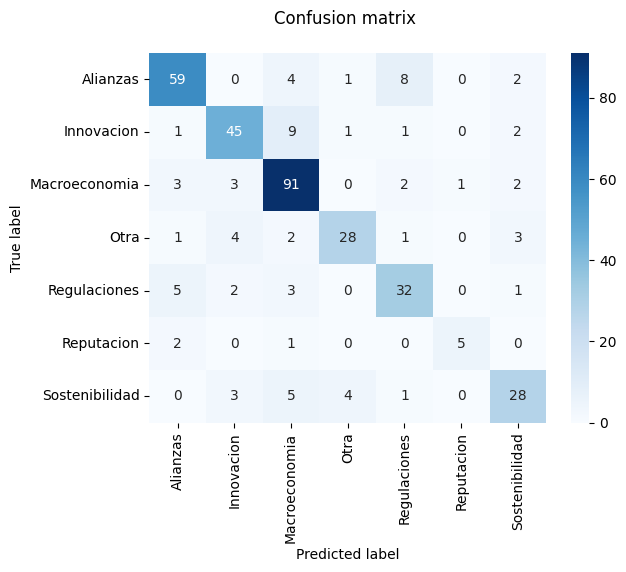

In [37]:
# EJECUTAR ESTE BLOQUE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred)

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred)

df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()


**Respuesta:**

Podemos ver una línea en la diagonal, lo cual es bastante bueno, ya que la mayoría de los datos están en la diagonal, lo que significa que el modelo predijo correctamente. Los valores que no están en la diagonal son los que el modelo predijo mal, y podemos ver que son pocos, por lo que el modelo es bastante bueno prediciendo.


Observamos que se forma una línea bastante marcada en la diagonal, lo cual significa que gran cantidad de los datos fueron clasificados correctamente.
Los valores en la matriz que no estan en las diagonales representan cantidad de entidades clasificadas incorrectamente. 
Notando que en proporción hay muchas más entidades clasificadas correctamente que incorrectamente, se afirma que el clasificador es relativamente bueno.


### Pregunta 5

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear.


In [38]:
# EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(
    clf, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

# Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la
# funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold


Promedio Precision: 0.8012047660398407
Promedio Recall: 0.7784679223916287
Promedio F1-score: 0.780849984495002
Promedio Accucary: 0.7912816691505216


- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 3.1. Comente en qué difieren y por qué.
- ¿Qué beneficios tiene emplear cross-validation?



**Respuesta:**

1. Los resultados actuales de las métricas suelen ser de mayor valor, obteniendo mejor precisión, recall, F1-score y accuracy. Concluimos que el modelo actual es preferible.

2. Como es un técnica de remuestreo sin reemplazo, tiene la ventaja de que cada ejemplo será usado para entrenamiento y validación exactamente una vez. Por lo que se puede obtener un mejor desempeño del modelo, ya que se entrena y valida con más datos. Por lo que el modelo es mejor.

### Pregunta 6

Cuando hacemos clasificación en Data Mining queremos encontrar un patrón en los datos. Analice los atributos de los datos junto a los resultados obtenidos en la pregunta 3.1 y describa sus principales observaciones. ¿Cómo se relacionan los atributos X con la clase de interés y? Es una pregunta abierta, puede apoyar su análisis con tablas y/o visualizaciones.

**Respuesta**

Sabemos que hay palabras más comunes en ciertas clases pueden haber palabras más comunes, por ejemplo, en Macroeconomía puede repetirse palabras como dólar, inflación, etc. Por lo que se puede ver que hay una relación entre las palabras y la clase de interés. Por lo que se puede ver que hay una relación entre las palabras y la clase de interés.

In [40]:
# imprimir arbol de decision
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 100))
tree.plot_tree(clf, fontsize=10)
plt.show()

Haciendo zoom en el árbol podemos ver que toma ciertas palabras, y si se repite unas ciertas ocasiones es capaz de clasificar correctamente, por lo que se puede ver que hay una relación entre las palabras y la clase de interés.

Veamos un ejemplo para una clase concreta:
 La palabra dólar se repite 1000 veces más que en las otras clases, por lo que es una palabra que se relaciona con la clase de interés. Asumimos que el modelo es capaz de identificar estas apariciones y asi obtener las relaciones.

In [66]:
print(y)

for c in ['dolar','boric','euro']:
    print ("---- %s ---" % c)
    print(df_vectorizado[c].value_counts())

0                Otra
1        Regulaciones
2            Alianzas
3       Macroeconomia
4                Otra
            ...      
1212       Innovacion
1213    Macroeconomia
1214         Alianzas
1215       Innovacion
1216         Alianzas
Name: Clasificación, Length: 1217, dtype: object
---- dolar ---
dolar
0    1147
1      50
2      12
3       3
9       2
4       1
8       1
5       1
Name: count, dtype: int64
---- boric ---
boric
0    1213
1       3
9       1
Name: count, dtype: int64
---- euro ---
euro
0    1189
1      13
2      11
4       2
3       2
Name: count, dtype: int64
